# **MÓDULO 12 - AULA 4**
# Analytics 2: Elementos Visuais - Construindo Gráficos em Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## Utilizaremos a matplotlib para criar os gráficos pois ela oferece muita flexibilidade e personalização

Iniciamos nossa atividade criando um dataframe com dados fictícios para que possamos criar os gráficos que vimos na última aula.

Iremos simular uma base de crédito, onde temos idades, salários e a pontuação de score das pessoas analisadas.

In [2]:
# Criando nosso dataframe com 20 registros
idades = np.random.randint(20, 60, 20)  # Idades aleatórias entre 20 e 60
salarios = idades * np.random.randint(80, 120, 20)  # Salários relacionados à idade
pontuacoes = salarios * np.random.uniform(0.5, 1.5, 20)  # Pontuações relacionadas ao salário
profissoes = ['Engenheiro', 'Professor', 'Médico', 'Advogado', 'Designer',
              'Analista', 'Gerente', 'Programador']

# Data frame:
novo_data = {
    'Idade': idades,
    'Salário': salarios,
    'Pontuação': pontuacoes.round(2)  # Arredondando as pontuações para 2 casas decimais
}
df = pd.DataFrame(novo_data)
df['Profissão'] = np.random.choice(profissoes, size=len(df))
df.head(10)  # Exibindo as primeiras 10 linhas do novo DataFrame

,Idade,Salário,Pontuação,Profissão
0,25,2150,1981.83,Programador
1,37,2997,2240.40,Programador
2,35,3990,2988.34,Designer
3,23,1840,1339.22,Professor
4,30,3540,2111.98,Advogado
5,39,3159,3864.85,Gerente
6,32,3296,3208.79,Professor
7,20,1800,1806.84,Professor
8,43,3784,3742.59,Médico
9,24,2640,1846.51,Programador


# **1 - Gráfico de Barras**

O primeiro gráfico que criaremos é um gráfico de barras. Conhecido como "Bar Plot":

No gráfico abaixo iremos observar a distribuição dos salários dentro do nosso df.

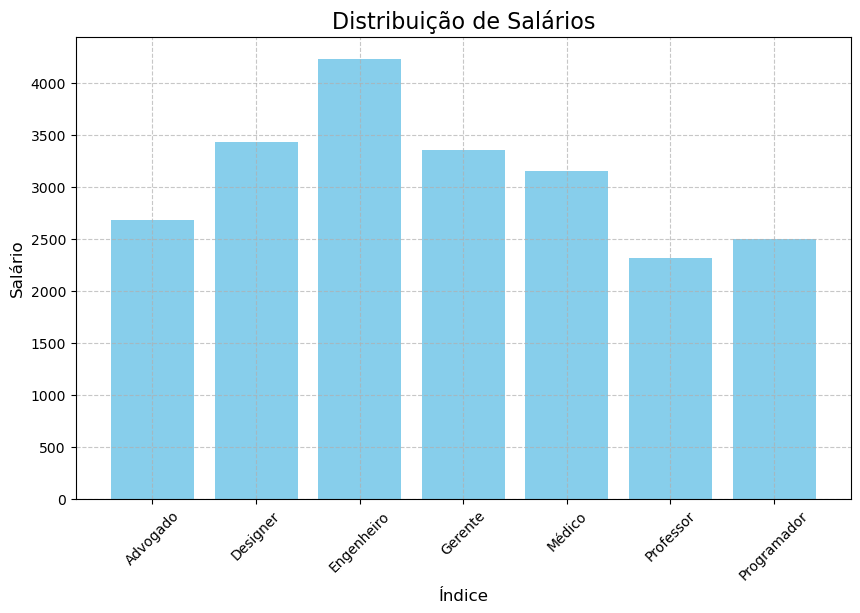

In [3]:
# Nessa etapa criamos a figura da imagem que será gerada, aqui nesses valores numéricos podemos alterar o tamanho da imagem.
plt.figure(figsize=(10, 6))

# Agrupando os dados do DataFrame por profissão e calculando a média do salário para cada profissão
salario_por_profissao = df.groupby('Profissão')['Salário'].mean()

# Indicamos aqui os índices do DataFrame no eixo x e os salários no eixo y, vejam que vocês podem realizar a alteração da cor, nesse caso usamos Skyblue
plt.bar(salario_por_profissao.index, salario_por_profissao, color='skyblue')

# Aqui adicionamos um título e podemos alterar o tamanho da sua fonte no "fontsize"
plt.title('Distribuição de Salários', fontsize=16)

# Adicionando um rótulo ao eixo x com tamanho de fonte 12
plt.xlabel('Índice', fontsize=12)

# Adicionando um rótulo ao eixo y com tamanho de fonte 12
plt.ylabel('Salário', fontsize=12)

# Nessa etapa rotacionamos os rótulos do eixo x em 45 graus para melhorar a legibilidade
plt.xticks(rotation=45)

# Adicionando grades ao gráfico com estilo de linha tracejada (--)
# e com transparência de 70% (alpha=0.7) para melhorar a visualização
plt.grid(True, linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.show()

Se quisessmos adicionar rótulos de dados em cada coluna teriamos que adicionar a seguinte linha de comando:

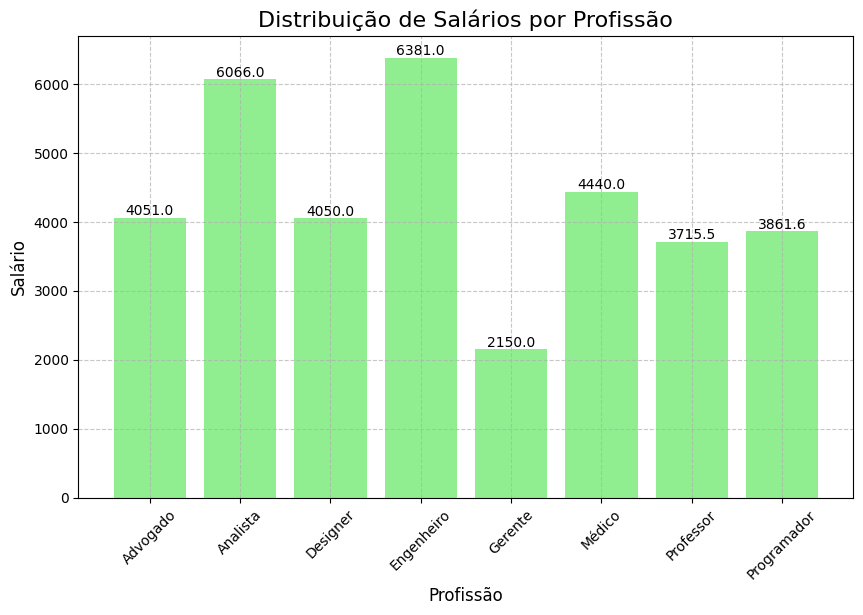

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
salario_por_profissao = df.groupby('Profissão')['Salário'].mean()
plt.bar(range(len(salario_por_profissao)), salario_por_profissao, color='lightgreen')
#O primeiro argumento define a posição das barras ao longo do eixo x. Utilizamos range(len(salario_por_profissao)) para criar uma sequência numérica que representa as posições das barras,

# Adicionando rótulos de dados, o loop do for itera cada indicec (i) e valor de salário do nosso df, o enumerate retornará o indice e o valor de cada elemento:
for i, valor in enumerate(salario_por_profissao):
    plt.text(i, valor, str(valor), ha='center', va='bottom', fontsize=10)

# Restante do código para personalização do gráfico
plt.title('Distribuição de Salários por Profissão', fontsize=16)
plt.xlabel('Profissão', fontsize=12)
plt.ylabel('Salário', fontsize=12)
plt.xticks(range(len(salario_por_profissao)), salario_por_profissao.index, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Agora faremos um gráfico de barras que contém a utilização da média, traremos os salários pelas idades:

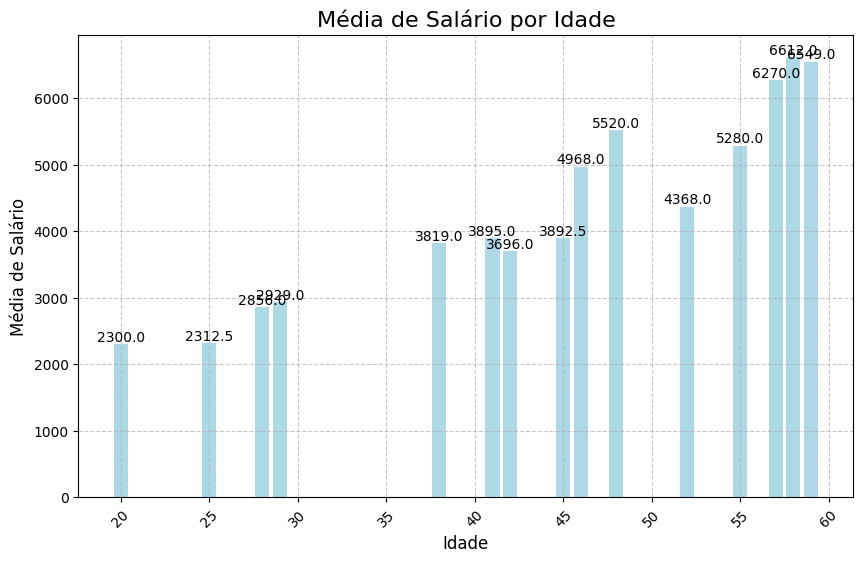

In [ ]:
# Calculando a média de salário para cada idade, notem que além de aplicar a função mean também aplicamos o group by pois os dados devem ser agrupados por idade.
media_salario_por_idade = df.groupby('Idade')['Salário'].mean()

# Criando o gráfico de barras com as médias de salário por idade
plt.figure(figsize=(10, 6))
bars = plt.bar(media_salario_por_idade.index, media_salario_por_idade, color='lightblue')

# Adicionando rótulos de dados
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
             ha='center', va='bottom', fontsize=10)
#'bar.get_x() + bar.get_width() / 2' calcula a posição horizontal do texto no centro da barra
#'bar.get_height()' obtém a altura da barra, que representa a média de salário para a idade correspondente
#'round(bar.get_height(), 2)' arredonda o valor da altura da barra para 2 casas decimais
#'ha='center'' alinha o texto horizontalmente ao centro da barra de cada idade
#'va='bottom'' alinha o texto verticalmente na parte inferior da barra de cada idade

# Adicionando rótulos ao gráfico
plt.title('Média de Salário por Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Média de Salário', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **2 - Gráfico de Linhas**

Uma vez que aprendemos com o gráfico de barras as principais personalizações podemos aplicar os mesmos conceitos ao gráfico de linha ou "Line Plot".

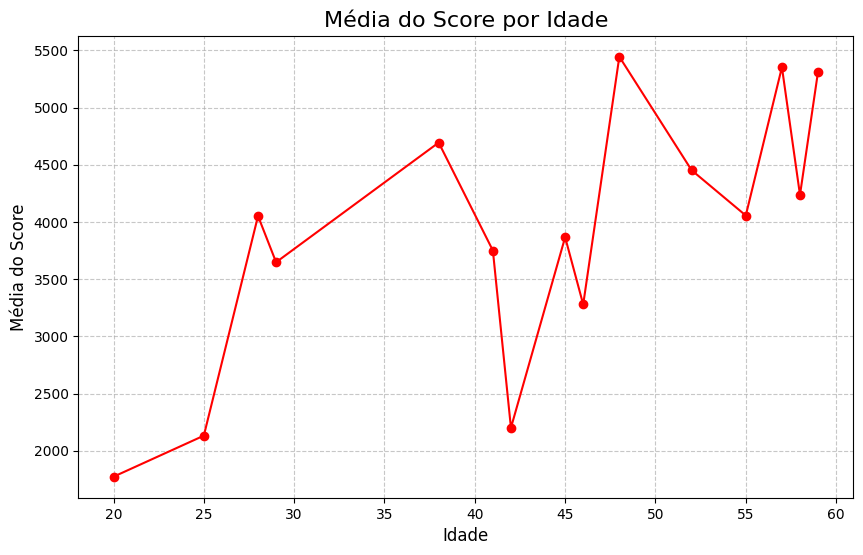

In [ ]:
# Calculando a média do score para cada idade com agrupamento
media_score_por_idade = df.groupby('Idade')['Pontuação'].mean()

# Ordenando as idades em ordem crescente utilizando o sort_index
media_score_por_idade = media_score_por_idade.sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_score_por_idade.index, media_score_por_idade, marker='o', color='red')
# plt.plot() é usado para criar um gráfico de linha
# marker='o' especifica que os pontos no gráfico serão marcados com círculos ('o')


# Adicionando as legendas dos rótulos
plt.title('Média do Score por Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Média do Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **3 - Gráfico de Linhas e Colunas**

Uniremos os dois conceitos vistos acima para conseguirmos desenvolver um gráfico de coluna + linha.

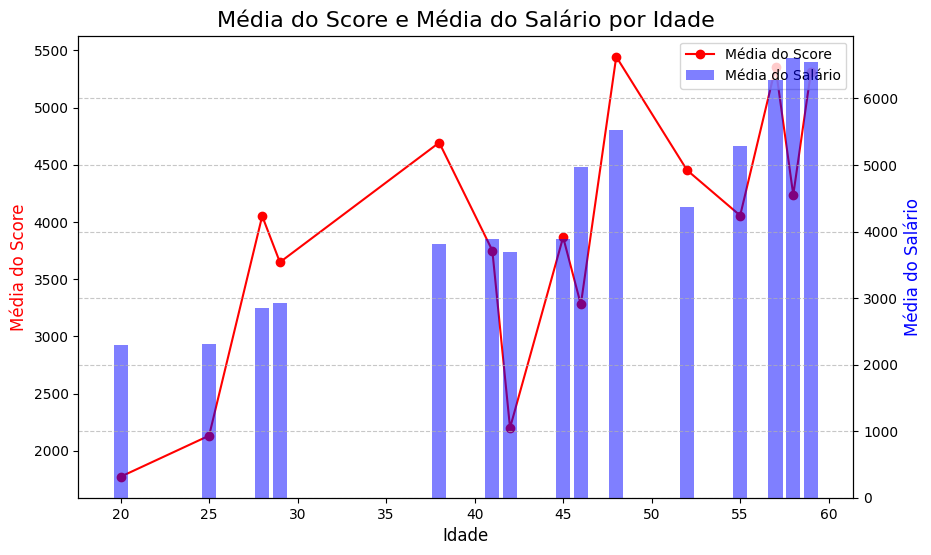

In [ ]:
# Calculando a média do salário para cada idade
media_salario_por_idade = df.groupby('Idade')['Salário'].mean()

# Ordenando as idades em ordem crescente
media_salario_por_idade = media_salario_por_idade.sort_index()

# Criando o gráfico de linha
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotando a média do score por idade
ax1.plot(media_score_por_idade.index, media_score_por_idade, marker='o', color='red', label='Média do Score')
ax1.set_xlabel('Idade', fontsize=12)
ax1.set_ylabel('Média do Score', color='red', fontsize=12)

# Adicionando uma segunda coluna para a média de salário por idade, essa etapa é a configuração do gráfico de barras
ax2 = ax1.twinx()  # Criando o segundo eixo y
ax2.bar(media_salario_por_idade.index, media_salario_por_idade, color='blue', alpha=0.5, label='Média do Salário')
ax2.set_ylabel('Média do Salário', color='blue', fontsize=12)

# Legendas:
# Obtendo as linhas e rótulos da legenda do primeiro eixo y (ax1)
lines1, labels1 = ax1.get_legend_handles_labels()
# Obtendo as linhas e rótulos da legenda do segundo eixo y (ax2)
lines2, labels2 = ax2.get_legend_handles_labels()

ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
# 'labels1 + labels2' concatena os rótulos das legendas dos dois eixos y
# 'loc='upper right'' especifica que a legenda será posicionada no canto superior direito do gráfico

plt.title('Média do Score e Média do Salário por Idade', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

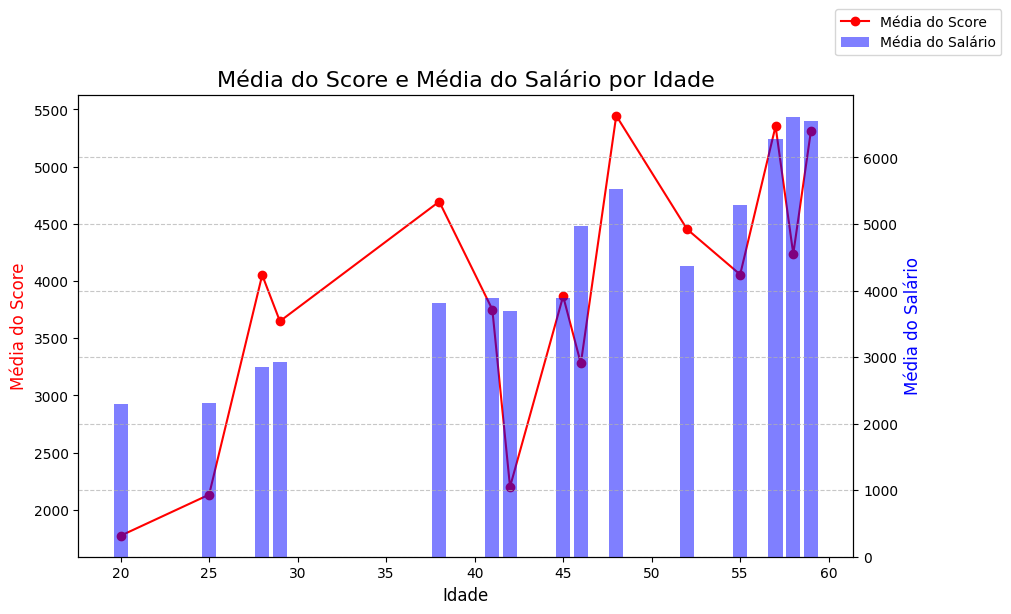

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(media_score_por_idade.index, media_score_por_idade, marker='o', color='red', label='Média do Score')
ax1.set_xlabel('Idade', fontsize=12)
ax1.set_ylabel('Média do Score', color='red', fontsize=12)

ax2 = ax1.twinx()
ax2.bar(media_salario_por_idade.index, media_salario_por_idade, color='blue', alpha=0.5, label='Média do Salário')
ax2.set_ylabel('Média do Salário', color='blue', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', bbox_to_anchor=(1.2, 1.2))
# Neste código, bbox_to_anchor=(1.2, 1.2) especifica que a legenda será posicionada a uma distância de 1.2 unidades da largura do gráfico e 1.2 unidade da altura do gráfico

plt.title('Média do Score e Média do Salário por Idade', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **4 - Gráfico de Dispersão**

Plotaremos agora um gráfico de dispersão das idades com relação ao salário. Onde cada ponto indicará uma linha do nosso data frame.

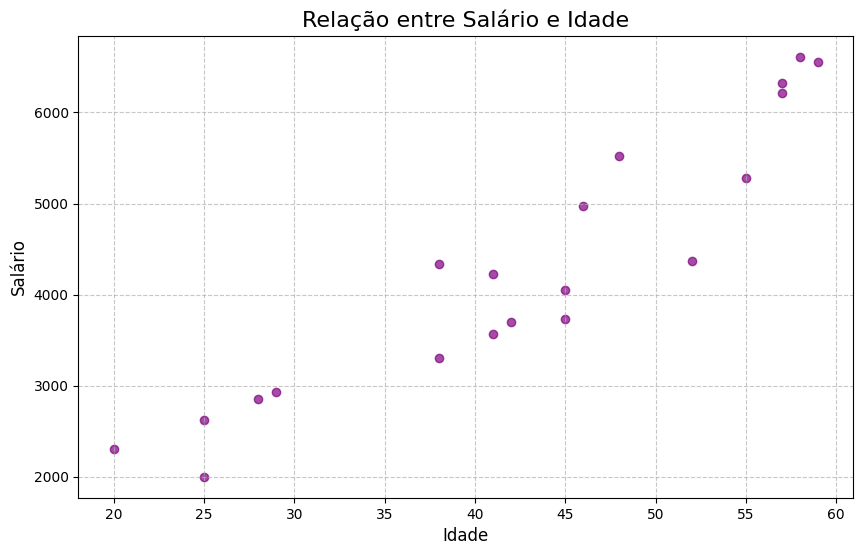

In [ ]:
# Criando o gráfico de dispersão de salário em relação à idade
plt.figure(figsize=(10, 6))
plt.scatter(df['Idade'], df['Salário'], color='purple', alpha=0.7)
#Notem que plt scatter é a função que usamos para plotar o gráfico de dispersão

# Adicionando legendas e rótulos
plt.title('Relação entre Salário e Idade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Salário', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **4 - Boxplot**

Iremos aplicar agora as variáveis de Pontuação e salário o boxplot, afim de identificar como está a distribuição dos nossos dados:

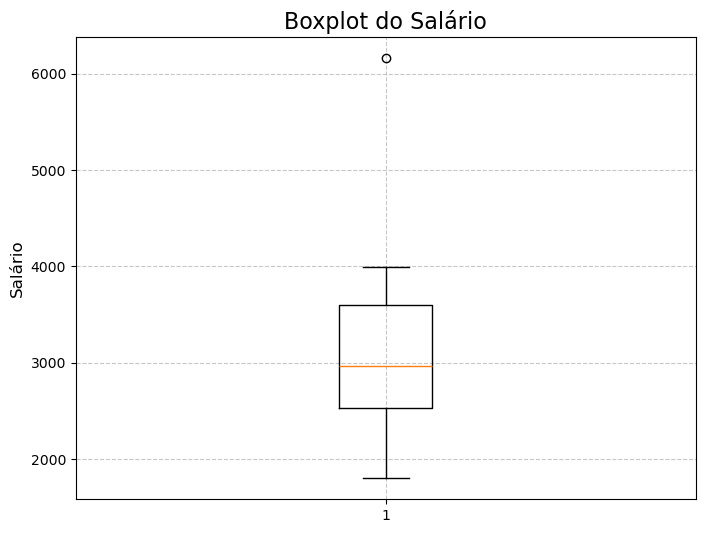

In [4]:
# Criando o boxplot apenas para a coluna de salário
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salário'])

# Legendas e rótulos:
plt.title('Boxplot do Salário', fontsize=16)
plt.ylabel('Salário', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

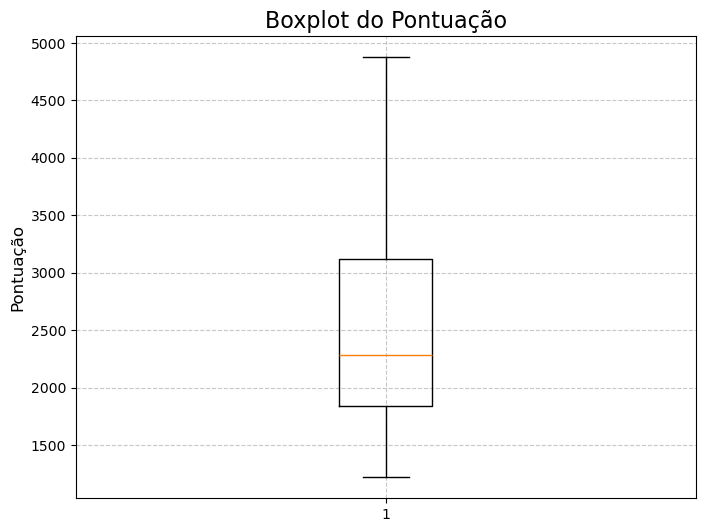

In [5]:
# Criando o boxplot apenas para a coluna de pontuação
plt.figure(figsize=(8, 6))
plt.boxplot(df['Pontuação'])

# Legendas e rótulos:
plt.title('Boxplot do Pontuação', fontsize=16)
plt.ylabel('Pontuação', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Poderiámos plotar ambos juntos da seguinte maneira:

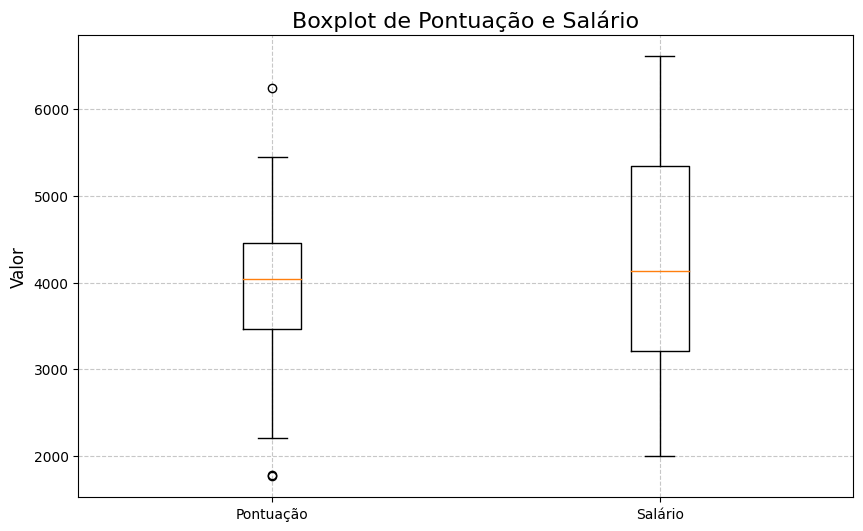

In [ ]:
# Criando o boxplot para idade e salário
plt.figure(figsize=(10, 6))
plt.boxplot([df['Pontuação'], df['Salário']], labels=['Pontuação', 'Salário'])
#Vejam que apenas trouxemos ambas colunas do nosso data frame original

plt.title('Boxplot de Pontuação e Salário', fontsize=16)
plt.ylabel('Valor', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Vamos simular um cenário em que temos nossos dados de salário muitos espaçados e temos outliers - PONTOS MUITO FORA DA NORMALIDADE.

In [6]:
# Criando um dataframe com esses dados de salário:
salarios = np.random.randint(2000, 10000, 18) ## 18 salários aleatórios

# Adicionando dois outliers à lista de salários
outliers = [15000, 18000]

# Concatenando ambos os dados:
salarios_com_outliers = np.concatenate((salarios, outliers))

df_salarios = pd.DataFrame({'Salário': salarios_com_outliers})
df_salarios.head(5)

,Salário
0,5871
1,8136
2,4822
3,2360
4,5939


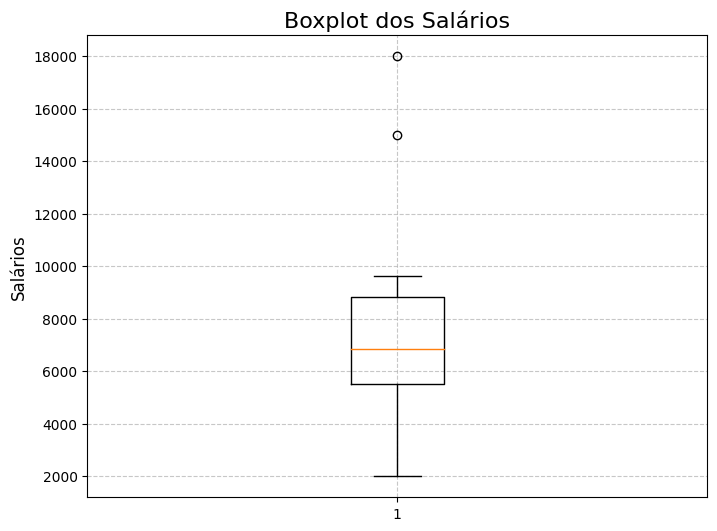

In [ ]:
# Criando o boxplot apenas para a coluna de pontuação
plt.figure(figsize=(8, 6))
plt.boxplot(df_salarios['Salário'])

# Legendas e rótulos:
plt.title('Boxplot dos Salários', fontsize=16)
plt.ylabel('Salários', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

No módulo 16 do curso de Ciência de Dados teremos uma aula apenas sobre boxplot e gráficos de dispersão para identificação de outliers!